In [13]:
import re
import numpy as np
import pickle

import pymorphy2

from wordcloud import WordCloud

# Gensim
import gensim


import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
lemma = WordNetLemmatizer()


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pymorphy2

[nltk_data] Downloading package wordnet to /home/artem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/artem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
prepare = False

In [87]:
#Приведение слов в нормальную форму при помощи pymorphy2

In [41]:
morph = pymorphy2.MorphAnalyzer(lang='uk')
f = open('News.txt')
p = morph.parse(f.read())[0]
data_normal_words = p.normal_form

with open('News_normalized.txt', 'w') as file:
       file.write(data_normal_words)

f.close()


In [43]:
print(data_normal_words[:300])

'u.s. presidents george w. bush and barack obama, when first elected, both thought they could establish a rapport with russian leader vladimir putin and dramatically improve u.s.-russian relations.', 'their appraisal of putin swiftly changed.', 'when asked his impression of putin after his first fac


In [ ]:
#Создаем словарь мусорных слов

In [31]:
stop_words = stopwords.words('english')
stop_words = ['xa', '.', 'one', 'first', 'many', 'well', 'will', 
              'need','russian', 'russia', 'now', 'know', 'ha', 'wa', 
              'said','new', 'time', 'make', 'including', 'two', 
              'even', 'think', 'say', 'take', 'part', 'day',
              'long', 'much', 'may', 'back', 'says', 'year',
              'around', 'news', 'without', 'data']
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(stop_words) 

In [32]:
def clean(text):
    # Remove new line characters
    text = re.sub('\s+', ' ', text)
    # Remove distracting single quotes
    text = re.sub("\'", "", text)
    return text


def doc_to_words(doc, stop_words, lemma):
    stop_words = set(stop_words)
    # remove stop words and punctuation
    words = [w for w in gensim.utils.simple_preprocess(str(doc), deacc=True) if w not in stop_words]
    return words

In [ ]:
# Очищаем данные по словарю

In [33]:
if prepare:
    file = open('News_normalized.txt') #News.txt
    # Convert to list
    data = file
    data = [clean(t) for t in data]
    data_clean_words = [doc_to_words(t, stop_words, lemma) for t in data]
    file.close()
    with open('Bag_words_news.pkl', 'wb') as f:
        pickle.dump(data_clean_words, f)
else:
    with open('Bag_words_news.pkl', 'rb') as f:
        data_clean_words= pickle.load(f)
        

In [34]:
print(data_clean_words[0][:10])

['presidents', 'george', 'bush', 'and', 'barack', 'obama', 'when', 'elected', 'both', 'thought']


In [ ]:
#Добавляем биграмы

In [35]:
if prepare:
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_clean_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    bigram_mod.save('bigram_mod.pkl')
    data_words_bigrams = [bigram_mod[w] for w in data_clean_words]
    with open('bigrams.pkl', 'wb') as f:
        pickle.dump(data_words_bigrams, f)

else:
    bigram_mod = gensim.models.Phrases.load('bigram_mod.pkl')
    
    with open('bigrams.pkl', 'rb') as f:
        data_words_bigrams = pickle.load(f)

In [44]:
print(data_words_bigrams[0][:100])

['presidents', 'george', 'bush', 'and', 'barack_obama', 'when', 'elected', 'both', 'thought', 'they', 'could', 'establish', 'rapport', 'with', 'leader', 'vladimir_putin', 'and', 'dramatically', 'improve', 'relations', 'their', 'appraisal', 'of', 'putin', 'swiftly', 'changed', 'when', 'asked', 'his', 'impression', 'of', 'putin', 'after', 'his', 'face', 'to', 'face', 'meeting', 'george', 'bush', 'looked', 'the', 'man', 'in', 'the', 'eye', 'found', 'him', 'very', 'straightforward', 'and', 'trustworthy', 'was', 'able', 'to', 'get', 'sense', 'of', 'his', 'soul', 'obama', 'eight', 'years', 'later', 'openly', 'sought', 'reset', 'in', 'relations', 'only', 'to', 'see', 'his', 'hopes', 'dashed', 'finally', 'with', 'annexation', 'of', 'the', 'ukrainian', 'peninsula', 'crimea', 'in', 'joe_biden', 'who', 'as', 'obama', 'vice_president', 'supported', 'the', 'reset', 'strategy', 'is', 'unlikely', 'to', 'follow', 'the', 'example', 'of']


In [ ]:
#Склейка текста

In [46]:
unit_text = ''
for i in range(len(data_words_bigrams[0])):
    unit_text += data_words_bigrams[0][i] + ' '
    
print(unit_text[:300])

presidents george bush and barack_obama when elected both thought they could establish rapport with leader vladimir_putin and dramatically improve relations their appraisal of putin swiftly changed when asked his impression of putin after his face to face meeting george bush looked the man in the ey


In [ ]:
#Очистка от предлогов 

In [47]:
pat = r'\b[a-zA-Z_]{3,}\b'
re_text = re.findall(pat, unit_text)
re_unit_text = ''
for i in range(len(re_text)):
    re_unit_text += re_text[i] + ' '
    
print(re_unit_text[:300])

presidents george bush and barack_obama when elected both thought they could establish rapport with leader vladimir_putin and dramatically improve relations their appraisal putin swiftly changed when asked his impression putin after his face face meeting george bush looked the man the eye found him 


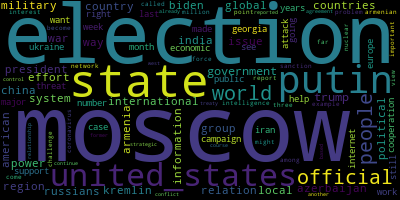

In [39]:
wordcloud = WordCloud(background_color='black', max_words=100)
wordcloud = wordcloud.generate(re_unit_text)
wordcloud.to_file('Top_50_news.png')
wordcloud.to_image() 